In [4]:
import pandas as pd

In [5]:
import pickle

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [18]:
df = pd.read_parquet('data/yellow_tripdata_2023-01.parquet')

In [19]:
# Question 1
df.shape

(3066766, 19)

In [20]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [21]:
# Question 2
df.duration.describe(percentiles=[0.99]).apply(lambda x: format(x, 'f'))

count    3066766.000000
mean          15.668995
std           42.594351
min          -29.200000
50%           11.516667
99%           57.250000
max        10029.183333
Name: duration, dtype: object

In [22]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [23]:
df.shape

(3009173, 20)

In [24]:
# Question 3
3009173/3066766

0.9812202822125979

In [12]:
categorical = ['PULocationID', 'DOLocationID']

df[categorical] = df[categorical].astype(str)

In [13]:
train_dicts = df[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)



In [14]:
# Question 4
X_train.get_shape

<bound method spmatrix.get_shape of <3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>>

In [15]:
target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

# Question 5
mean_squared_error(y_train, y_pred, squared=False)

7.649261930819891

In [5]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [6]:
df_train = read_dataframe('./data/yellow_tripdata_2023-01.parquet')
df_val = read_dataframe('./data/yellow_tripdata_2023-02.parquet')

In [7]:
len(df_train), len(df_val)

(3009173, 2855951)

In [8]:
categorical = ['PULocationID', 'DOLocationID']

dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [9]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

# Question 6
mean_squared_error(y_val, y_pred, squared=False)

7.811817675774269

In [15]:
with open('models/lr_yello_2023.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

/home/codespace/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


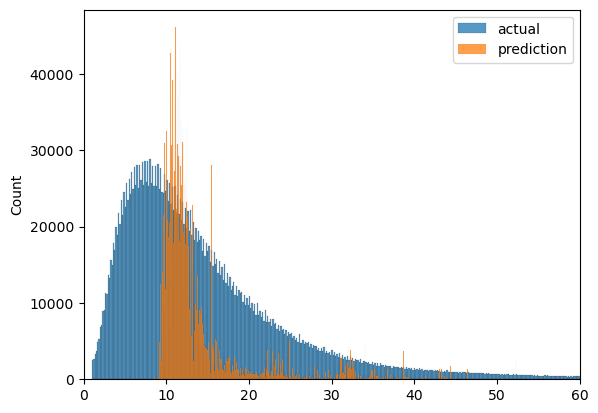

In [14]:
sns.histplot(y_val, label='actual')
sns.histplot(y_pred, label='prediction')

ax = plt.gca()
ax.set_xlim([0, 60])
plt.legend()